In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [2]:
df = pd.read_csv('../US_births.csv', low_memory=False)

In [3]:
# df = df.sample(n=100_000, random_state=42)

In [4]:
df.shape

(3801534, 55)

In [5]:
df.drop(df[df['DBWT'].eq(9999)].index, inplace=True)

In [6]:
df.drop(df[df['BMI'].eq(99.9)].index, inplace=True)
df.drop(df[df['DBWT'].eq(9999)].index, inplace=True)
df.drop(df[df['WTGAIN'].eq(99)].index, inplace=True)
df.drop(df[df['PWgt_R'].eq(999)].index, inplace=True)
df['binary_sex'] = np.where(df['SEX'] == 'M', 1, 0)
df.drop(df[df['FAGECOMB'].eq(99)].index, inplace=True)
df['first_birth'] = np.where(df['ILLB_R'].eq(888), 1, 0)

In [7]:
df.shape

(3256789, 57)

In [8]:
conditions = [df['CIG_0'].eq(0),
              df['CIG_0'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['smoked'] = np.select(conditions, choices, 'Daily')

In [9]:
conditions = [df['PRIORDEAD'].eq(0),
              df['PRIORDEAD'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['PRIORDEAD_cat'] = np.select(conditions, choices, 'Yes')

In [10]:
conditions = [df['PRIORTERM'].eq(0),
              df['PRIORTERM'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['PRIORTERM_cat'] = np.select(conditions, choices, 'Yes')

In [11]:
conditions = [df['PRIORLIVE'].eq(0),
              df['PRIORLIVE'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['PRIORLIVE_cat'] = np.select(conditions, choices, 'Yes')

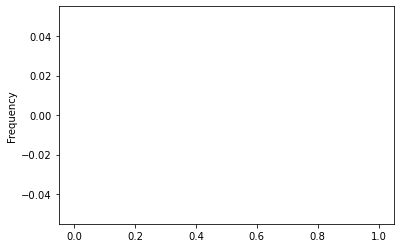

In [12]:
df[df['WTGAIN'].eq(99)]['BMI'].plot(kind='hist')

In [13]:
df.shape

(3256789, 61)

In [14]:
# sns.distplot(df['BMI'])

In [15]:
df['BMI_log'] = np.log(df['BMI'])
# sns.distplot(df['BMI_log'])

In [16]:
# sns.jointplot(x='BMI_log', y= 'DBWT', data =df, kind='reg')

In [17]:
# sns.jointplot(x='BMI', y= 'DBWT', data =df, kind='reg')

In [18]:
# sns.jointplot(x='MAGER', y= 'DBWT', data =df, kind='reg')

In [19]:
# sns.jointplot(x='WTGAIN', y= 'DBWT', data =df, kind='reg')

In [20]:
# sns.distplot(df['DBWT'])

In [21]:
df['SEX'].unique()

array(['M', 'F'], dtype=object)

In [22]:
_M_df = df[df['SEX'].eq('M')]
_F_df = df[df['SEX'].eq('F')]

In [23]:
# sns.distplot(_M_df['DBWT'])
# sns.distplot(_F_df['DBWT'])

In [24]:
from statsmodels.formula.api import ols
formula = 'DBWT~binary_sex'
model = ols(formula=formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DBWT   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                 3.278e+04
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:51:31   Log-Likelihood:            -2.5319e+07
No. Observations:             3256789   AIC:                         5.064e+07
Df Residuals:                 3256787   BIC:                         5.064e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3225.4664      0.456   7067.934      0.000    3224.572    3226.361
binary_sex   115.5284      0.638    181.064      0.000     114.278     116.779
==============================================================================
Omnibus:                   508399.393   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1424184.528
Skew:                          -0.845   Prob(JB):                         0.00
Kurtosis:                       5.764   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
from scipy import stats
stats.f_oneway(_M_df['DBWT'], _F_df['DBWT'])

F_onewayResult(statistic=32784.083426716774, pvalue=0.0)

In [26]:
del _M_df
del _F_df

In [27]:
df['MRAVE6'].unique()

array([1, 3, 4, 6, 2, 5], dtype=int64)

In [28]:
_1_race = df[df['MRAVE6'].eq(1)]
_2_race = df[df['MRAVE6'].eq(2)]
_3_race = df[df['MRAVE6'].eq(3)]
_4_race = df[df['MRAVE6'].eq(4)]
_5_race = df[df['MRAVE6'].eq(5)]
_6_race = df[df['MRAVE6'].eq(6)]

In [29]:
# sns.distplot(_1_race['DBWT'])
# sns.distplot(_2_race['DBWT'])
# sns.distplot(_3_race['DBWT'])
# sns.distplot(_4_race['DBWT'])
# sns.distplot(_5_race['DBWT'])
# sns.distplot(_6_race['DBWT'])

In [30]:
stats.f_oneway(_1_race['DBWT'], _2_race['DBWT'], _3_race['DBWT'], _4_race['DBWT'], _5_race['DBWT'], _6_race['DBWT'])

F_onewayResult(statistic=12070.805821450753, pvalue=0.0)

In [31]:
del _1_race
del _2_race
del _3_race
del _4_race
del _5_race
del _6_race

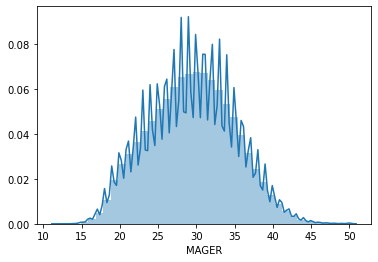

In [32]:
sns.distplot(df['MAGER'], bins = 39)

In [33]:
df.shape

(3256789, 62)

In [34]:
df['NO_INFEC'].value_counts()

1    3186081
0      65614
9       5094
Name: NO_INFEC, dtype: int64

In [35]:
df['MRAVE6'].value_counts()

1    2480849
2     417573
4     239402
6      81582
3      27543
5       9840
Name: MRAVE6, dtype: int64

In [36]:
df['PRIORTERM'].value_counts()

0     2367561
1      580899
2      193005
3       65888
4       23658
5        9448
99       7135
6        4217
7        2014
8        1127
9         640
10        558
11        233
12        171
13         93
14         49
15         26
17         20
16         17
18         10
19          7
21          3
20          2
24          2
27          2
28          1
23          1
25          1
26          1
Name: PRIORTERM, dtype: int64

In [37]:
df['FRACE6'].value_counts()


1    2250313
2     453191
9     238326
4     206350
6      75891
3      23617
5       9101
Name: FRACE6, dtype: int64

In [38]:
df['SEX'].value_counts()

M    1666000
F    1590789
Name: SEX, dtype: int64

In [39]:
df['PAY'].value_counts()

2    1751527
1    1223750
3     138239
8      59094
5      43301
6      23767
9      14953
4       2158
Name: PAY, dtype: int64

In [40]:
df['DMAR'].unique()

array(['1', '2', ' '], dtype=object)

In [41]:
df['LD_INDL'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [42]:
df['RF_CESAR'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [43]:
df['NO_RISKS'].unique()

array([1, 0, 9], dtype=int64)

In [44]:
df['NO_MMORB'].unique()

array([1, 0, 9], dtype=int64)

In [45]:
df['MAGE_IMPFLG'].unique()

array([' ', '1'], dtype=object)

In [46]:
df['ILLB_R'].value_counts()

888    1233422
999      93597
23       45081
24       44910
22       44802
25       44048
21       43398
26       43380
3        42238
27       41775
28       40845
20       40293
29       39520
30       38432
31       37298
19       37035
32       36408
33       35348
18       34278
34       33820
35       32179
17       30897
36       30766
37       29246
16       27904
38       27583
39       26613
40       25361
15       25142
41       24358
42       23761
43       23213
14       22966
44       22152
45       21487
13       21083
46       20902
47       19975
48       19382
12       18581
49       18489
50       17836
51       17325
52       16529
53       16297
54       15622
55       15080
56       14858
57       14610
58       13881
59       13232
60       13098
11       12961
61       12426
62       12038
63       11676
64       11375
65       11186
66       10879
67       10779
68       10383
69       10297
70        9906
72        9721
71        9636
73        9304
74        

In [47]:
df['ILP_R'].value_counts()

888    999664
999    368369
12      46582
21      45865
22      45806
23      45149
24      44428
20      43804
13      43176
11      42986
25      42654
19      42083
26      41138
18      40687
14      40325
27      39420
17      39279
15      38988
16      38846
28      38018
3       37966
29      36242
30      35158
31      33874
32      32648
10      32210
33      31557
34      29851
35      28096
36      26962
37      25452
38      23637
39      22706
40      21760
41      20782
42      20133
43      19613
44      18665
45      17860
46      17330
47      16660
48      16176
9       15758
49      15284
50      14707
51      14177
52      13538
53      13425
54      12852
55      12461
56      11975
57      11795
58      11128
60      10635
59      10614
61      10124
62       9660
63       9398
64       9079
65       8894
66       8672
67       8624
68       8305
69       8248
70       7905
72       7873
71       7680
73       7349
74       7085
75       6982
76       6745
78    

In [48]:
df['first_birth'] = np.where(df['ILLB_R'].eq(888), 1, 0)

In [49]:
df['plural_delivery'] = np.where(df['ILLB_R'].lt(4), 'Yes', 'No')

In [50]:
df['first_pregnancy'] = np.where(df['ILP_R'].eq(888), 1, 0)

In [51]:
len(df[df['ILLB_R'].lt(4)])

42238

In [52]:
len(df[df['ILOP_R'].lt(4)])

381

In [53]:
len(df[df['ILP_R'].lt(4)])

37966

In [54]:
len(df[df['ILLB_R'].eq(888)])

1233422

In [55]:
len(df[df['ILOP_R'].eq(888)])

2367561

In [56]:
len(df[df['ILP_R'].eq(888)])

999664

In [57]:
df['first_natal'] = np.where(df['ILOP_R'].eq(888),1, 0)

In [58]:
df['first_birth'].value_counts()

0    2023367
1    1233422
Name: first_birth, dtype: int64

In [59]:
df['plural_delivery'].value_counts()

No     3214551
Yes      42238
Name: plural_delivery, dtype: int64

In [60]:
df['PRECARE'] = np.where(df['PRECARE'].eq(99), 0, df['PRECARE'])
df['PRECARE'].value_counts()

2     1342182
3     1025305
4      274009
1      192201
5      129820
0       94660
6       77250
7       60360
8       44135
9       16579
10        288
Name: PRECARE, dtype: int64

In [61]:
df['PREVIS'] = np.where(df['PREVIS'].eq(99), 0, df['PREVIS'])

In [62]:
df['PRIORLIVE_cat'].value_counts()

Yes        2013653
None       1239502
Unknown       3634
Name: PRIORLIVE_cat, dtype: int64

In [63]:
df['PWgt_R'].value_counts()

130    134089
140    120147
150    119964
135    107772
120    103008
160     99183
145     92357
125     90613
180     72428
170     70018
155     60648
165     60565
115     57240
110     52550
175     47877
200     45746
190     44734
185     36836
138     34791
128     34511
132     33100
118     29655
220     27685
148     27418
127     27037
143     26151
142     25271
134     25097
136     24807
105     24707
123     23824
154     23666
100     23418
137     22777
147     22520
158     22349
195     21747
210     21346
230     21209
126     21061
152     20965
124     20796
133     20724
156     20538
168     20250
122     20067
117     19570
112     19202
153     18710
146     18479
144     18264
215     17451
163     17071
164     17037
116     16855
162     16814
139     16718
178     16708
119     16648
149     16547
129     16353
157     16139
114     16044
167     15771
240     15732
121     15677
172     15526
108     15472
174     15417
141     15353
176     15118
250   

In [64]:
df['WTGAIN'].value_counts()

30    157091
20    117693
25    114530
35    105628
40     96882
28     92078
0      89132
27     88260
32     88186
33     85854
26     85374
22     83722
31     83216
29     82494
24     82397
23     80494
34     77388
36     70399
21     69313
37     68170
38     66300
15     64047
18     61548
19     58552
39     55413
17     55407
45     54789
16     51816
42     50231
41     47602
10     45588
43     44726
50     44026
14     43309
44     41359
13     40945
12     39476
46     33771
11     33269
47     31296
48     30113
9      25721
8      25623
49     24505
7      22845
55     21643
5      21635
6      20979
52     19786
51     19777
53     18230
4      16663
60     16621
54     15717
3      14864
2      14216
56     12683
1      11795
57     11546
58     11192
59      8966
65      7872
62      7098
61      6985
63      6349
70      6066
64      5758
66      4806
98      4466
67      4083
68      4050
69      3170
75      2864
71      2455
72      2422
80      2345
73      2230

In [65]:
df['MAGER^2'] = df['MAGER'] ** 2

In [66]:
df['35AGE_older'] = np.where(df['MAGER'].gt(34), 1, 0)

In [67]:
# sns.jointplot(x='PRECARE', y='DBWT', data=df,kind='reg')

In [68]:
X = df[['ATTEND','BFACIL', 'BMI','smoked', 'DOB_MM', 'DMAR','FAGECOMB','FHISPX','FEDUC', 'FRACE6', 'first_birth', 'plural_delivery', 'first_pregnancy', 'plural_delivery', 'first_natal',
        'IP_GON', 'LD_INDL', 'MAGER', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN',
        'NO_INFEC','NO_MMORB','NO_RISKS','PAY', 'PAY_REC','PRECARE','PREVIS', 'PRIORDEAD_cat', 'PRIORLIVE_cat', 'PRIORTERM_cat', 'PWgt_R', 'BMI_log','M_Ht_In',
        'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX', 'WTGAIN'
]]
_X = pd.get_dummies(X, columns=['ATTEND', 'BFACIL','smoked', 'DOB_MM','DMAR','FHISPX','FEDUC','FRACE6', 'plural_delivery',
                                'IP_GON','LD_INDL', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN',
                                'NO_INFEC','NO_MMORB','NO_RISKS', 'PAY', 'PAY_REC','PRIORDEAD_cat', 'PRIORLIVE_cat','PRIORTERM_cat',
                                'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX'])
y = df['DBWT']

In [69]:
# _X['DBWT'] = y


In [70]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy='median')
dummy_regr.fit(_X,y)


DummyRegressor(constant=None, quantile=None, strategy='median')

In [71]:
_dummy_y = dummy_regr.predict(X)

In [72]:
np.sqrt(metrics.mean_squared_error(y, _dummy_y))

579.3790768475608

In [73]:
df['M_Ht_In'].value_counts()

64    485836
63    426466
62    411538
65    389089
66    360370
67    285656
61    232789
60    178198
68    158964
69    105752
59     73188
70     53522
71     27306
58     18860
57     16132
72     12652
56      5820
73      4098
55      2530
74      2005
54      1147
53      1095
75       721
78       622
76       417
48       379
77       369
49       368
52       346
51       276
50       220
47        13
45         8
46         7
41         7
36         5
40         4
39         4
42         3
37         3
38         2
44         1
43         1
Name: M_Ht_In, dtype: int64

In [74]:
df['smoked'].value_counts()

None       3020419
Daily       225955
Unknown      10415
Name: smoked, dtype: int64

In [75]:
list(_X.columns)

['BMI',
 'FAGECOMB',
 'first_birth',
 'first_pregnancy',
 'first_natal',
 'MAGER',
 'PRECARE',
 'PREVIS',
 'PWgt_R',
 'BMI_log',
 'M_Ht_In',
 'WTGAIN',
 'ATTEND_1',
 'ATTEND_2',
 'ATTEND_3',
 'ATTEND_4',
 'ATTEND_5',
 'ATTEND_9',
 'BFACIL_1',
 'BFACIL_2',
 'BFACIL_3',
 'BFACIL_4',
 'BFACIL_5',
 'BFACIL_6',
 'BFACIL_7',
 'BFACIL_9',
 'smoked_Daily',
 'smoked_None',
 'smoked_Unknown',
 'DOB_MM_1',
 'DOB_MM_2',
 'DOB_MM_3',
 'DOB_MM_4',
 'DOB_MM_5',
 'DOB_MM_6',
 'DOB_MM_7',
 'DOB_MM_8',
 'DOB_MM_9',
 'DOB_MM_10',
 'DOB_MM_11',
 'DOB_MM_12',
 'DMAR_ ',
 'DMAR_1',
 'DMAR_2',
 'FHISPX_0',
 'FHISPX_1',
 'FHISPX_2',
 'FHISPX_3',
 'FHISPX_4',
 'FHISPX_5',
 'FHISPX_6',
 'FHISPX_9',
 'FEDUC_1',
 'FEDUC_2',
 'FEDUC_3',
 'FEDUC_4',
 'FEDUC_5',
 'FEDUC_6',
 'FEDUC_7',
 'FEDUC_8',
 'FEDUC_9',
 'FRACE6_1',
 'FRACE6_2',
 'FRACE6_3',
 'FRACE6_4',
 'FRACE6_5',
 'FRACE6_6',
 'FRACE6_9',
 'plural_delivery_No',
 'plural_delivery_Yes',
 'plural_delivery_No',
 'plural_delivery_Yes',
 'IP_GON_N',
 'IP_GON_U',

In [76]:
df['PRECARE'].value_counts()

2     1342182
3     1025305
4      274009
1      192201
5      129820
0       94660
6       77250
7       60360
8       44135
9       16579
10        288
Name: PRECARE, dtype: int64

In [77]:
# sns.jointplot(x='MAGER',y='DBWT', data=df,kind='reg')

In [78]:
df['DBWT_sqrt'] = np.sqrt(df['DBWT'])

In [79]:
df['smoked']

0           None
1          Daily
2           None
3           None
4           None
           ...  
3801528     None
3801529     None
3801530     None
3801531     None
3801533     None
Name: smoked, Length: 3256789, dtype: object

In [80]:
df['DLMP_MM'].value_counts()

12    282517
11    273369
10    273227
8     263613
9     262991
1     262721
5     258234
7     257470
6     255423
3     254369
4     250042
2     239309
99    123504
Name: DLMP_MM, dtype: int64

In [81]:
df.drop(df[df['DLMP_MM'].eq(99)].index, inplace=True)

In [82]:
df['DOB_MM'].value_counts()

8     285226
7     272713
10    270215
5     266991
9     266737
3     261947
6     261252
1     258203
11    253747
12    253439
4     248870
2     233945
Name: DOB_MM, dtype: int64

In [83]:
df.drop(df[df['DLMP_YY'].eq(9999)].index, inplace=True)

In [84]:
df['DLMP_YY'].value_counts()

2017    2360362
2018     770617
2016       1958
Name: DLMP_YY, dtype: int64

In [85]:
df['DOB_YY'].value_counts()

2018    3132937
Name: DOB_YY, dtype: int64

In [86]:
df[df['DLMP_YY'].eq(2016)]

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,DOB_WK,DOB_YY,DWgt_R,FAGECOMB,FEDUC,FHISPX,FRACE15,FRACE31,FRACE6,ILLB_R,ILOP_R,ILP_R,IMP_SEX,IP_GON,LD_INDL,MAGER,MAGE_IMPFLG,MAR_IMP,MBSTATE_REC,MEDUC,MHISPX,MM_AICU,MRACE15,MRACE31,MRACEIMP,MRAVE6,MTRAN,M_Ht_In,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,binary_sex,first_birth,smoked,PRIORDEAD_cat,PRIORTERM_cat,PRIORLIVE_cat,BMI_log,plural_delivery,first_pregnancy,first_natal,MAGER^2,35AGE_older,DBWT_sqrt
11978,1,1,34.0,0,3740,11,2016,2,1,347,3,2018,218,32,3,0,2,2,2,19,888,19,,N,Y,24,,,1,3,0,N,2,2,,2,N,63,1,1,0,2,2,3,12,0,1,0,192,1,2,N,0,M,26,1,0,None,None,None,Yes,3.526361,No,0,1,576,0,61.155539
12207,1,1,23.4,0,2296,12,2016,1,1,1842,3,2018,136,23,5,0,2,2,2,26,888,26,,N,Y,25,,,1,4,0,N,2,2,,2,N,62,1,1,0,5,4,8,9,0,2,0,128,1,1,N,0,F,8,0,0,None,None,None,Yes,3.152736,No,0,1,625,0,47.916594
12710,1,1,23.7,0,3685,10,2016,1,1,1005,5,2018,196,24,6,0,1,1,1,888,888,888,,N,N,23,,,1,6,0,N,1,1,,1,N,66,1,1,1,2,2,2,13,0,0,0,147,3,1,N,0,M,49,1,1,None,None,None,None,3.165475,No,1,1,529,0,60.704201
13424,1,1,28.3,0,3500,7,2016,1,1,1454,4,2018,178,29,6,0,1,1,1,888,888,888,,N,Y,28,,,1,3,0,N,1,1,,1,N,61,1,1,1,2,2,3,10,0,0,0,150,1,2,N,0,F,28,0,1,None,None,None,None,3.342862,No,1,1,784,0,59.160798
14915,1,1,21.3,0,2579,5,2016,2,1,2051,2,2018,138,36,3,0,2,2,2,59,888,59,,N,N,26,,,1,3,0,N,1,1,,1,N,64,1,1,1,1,1,3,11,0,2,0,124,1,1,N,0,M,14,1,0,None,None,None,Yes,3.058707,No,0,1,676,0,50.783856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637404,1,1,23.2,0,3799,11,2016,1,8,2328,4,2018,172,27,3,0,1,1,1,11,888,11,,N,N,24,,,1,4,0,N,1,1,,1,N,64,1,1,1,1,1,3,14,0,1,0,135,1,1,N,0,M,37,1,0,None,None,None,Yes,3.144152,No,0,1,576,0,61.636028
3644111,1,1,26.3,0,3005,12,2016,1,9,1407,4,2018,156,39,3,0,1,1,1,65,35,35,,N,N,38,,,1,5,0,N,1,1,,1,N,62,1,1,0,2,2,3,11,0,2,2,144,3,1,N,0,F,12,0,0,None,None,Yes,Yes,3.269569,No,0,0,1444,1,54.817880
3653109,2,1,48.4,0,4167,8,2016,1,11,1648,6,2018,372,29,6,0,1,1,1,18,888,18,,N,Y,30,,,1,8,0,N,1,1,,1,N,69,1,1,1,2,2,3,14,0,1,0,328,1,3,N,0,F,44,0,0,None,None,None,Yes,3.879500,No,0,1,900,0,64.552304
3657267,1,1,25.2,0,3856,3,2016,1,12,1513,3,2018,163,42,4,4,1,1,1,18,30,18,,N,Y,39,,,1,4,0,N,1,1,,1,N,64,1,1,0,2,2,4,7,0,3,2,147,1,2,N,0,M,16,1,0,None,None,Yes,Yes,3.226844,No,0,0,1521,1,62.096699


In [87]:
conditions = [(df['DOB_MM'] > df['DLMP_MM']) & (2018 == df['DLMP_YY']),
              (df['DOB_MM'] > df['DLMP_MM']) & (2018 > df['DLMP_YY']),
              (df['DOB_MM'] < df['DLMP_MM']) & (2018 > df['DLMP_YY'])
    
]
choices = [df['DOB_MM'] - df['DLMP_MM'],
           ((df['DOB_YY'] - df['DLMP_YY'])* 12) + df['DOB_MM'] - df['DLMP_MM'],
           ((df['DOB_YY'] - df['DLMP_YY'])* 12) - df['DLMP_MM'] + df['DOB_MM']
    
]
df['pregnancy_length'] = np.select(conditions,choices, 12)

In [88]:
df['pregnancy_length'].value_counts()

9     2170373
10     454488
8      409023
7       47323
11      19010
6       15393
5        5284
12       4239
13       1545
4        1061
14        973
15        663
21        574
16        467
17        320
18        311
20        291
19        277
3         259
22        196
2         154
1         153
23        111
25         85
27         73
26         59
30         49
29         46
28         43
31         34
33         33
32         16
34         10
35          1
Name: pregnancy_length, dtype: int64

In [89]:
# pd.qcut(df['pregnancy_length'],q=2)

In [90]:
df['pregnancy_length_WTGAIN'] = df['pregnancy_length']/df['PWgt_R']

In [91]:
df[df['pregnancy_length'].gt(30)]

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,DOB_WK,DOB_YY,DWgt_R,FAGECOMB,FEDUC,FHISPX,FRACE15,FRACE31,FRACE6,ILLB_R,ILOP_R,ILP_R,IMP_SEX,IP_GON,LD_INDL,MAGER,MAGE_IMPFLG,MAR_IMP,MBSTATE_REC,MEDUC,MHISPX,MM_AICU,MRACE15,MRACE31,MRACEIMP,MRAVE6,MTRAN,M_Ht_In,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,binary_sex,first_birth,smoked,PRIORDEAD_cat,PRIORTERM_cat,PRIORLIVE_cat,BMI_log,plural_delivery,first_pregnancy,first_natal,MAGER^2,35AGE_older,DBWT_sqrt,pregnancy_length,pregnancy_length_WTGAIN
610999,1,1,16.5,0,3710,5,2016,,12,1320,5,2018,138,37,7,0,2,2,2,22,888,22,,N,N,32,,,2,6,0,N,2,2,,2,N,66,1,1,0,2,2,2,15,0,1,0,102,4,1,Y,1,F,36,0,0,None,None,None,Yes,2.803360,No,0,1,1024,0,60.909769,31,0.303922
731208,1,1,30.2,0,3430,1,2016,1,10,1328,7,2018,187,36,3,0,1,1,1,23,888,23,,N,N,23,,,2,3,0,N,1,1,,1,N,66,1,1,1,2,2,2,15,0,1,0,187,1,3,N,0,F,0,0,0,None,None,None,Yes,3.407842,No,0,1,529,0,58.566202,33,0.176471
733807,1,1,19.7,0,4026,1,2016,1,10,1508,4,2018,160,40,6,0,1,1,1,48,888,48,,N,N,36,,,1,6,0,N,1,1,,1,N,67,1,1,1,2,2,2,14,0,3,0,126,1,1,N,0,F,34,0,0,None,None,None,Yes,2.980619,No,0,1,1296,1,63.450768,33,0.261905
1094797,4,3,24.9,0,3487,2,2016,1,10,1712,4,2018,174,34,8,0,1,1,1,22,33,22,,N,N,33,,,1,6,0,N,1,1,,1,N,64,1,1,1,3,3,2,14,0,3,2,145,1,1,N,0,M,29,1,0,None,None,Yes,Yes,3.214868,No,0,0,1089,0,59.050826,32,0.220690
1108387,3,2,25.0,0,3090,5,2016,1,12,2047,3,2018,186,40,6,0,1,1,1,21,888,21,,N,N,34,,,1,6,0,N,1,1,,1,N,65,1,1,1,2,2,3,13,0,2,0,150,1,2,N,0,F,36,0,0,None,None,None,Yes,3.218876,No,0,1,1156,0,55.587768,31,0.206667
1111726,1,1,20.6,0,2759,3,2016,1,12,2033,1,2018,142,23,3,0,1,1,1,24,105,24,,N,N,25,,,1,5,0,N,1,1,,1,N,64,1,1,0,1,1,3,13,0,1,1,120,4,1,Y,1,M,22,1,0,None,None,Yes,Yes,3.025291,No,0,0,625,0,52.526184,33,0.275000
1128614,1,1,26.5,0,3345,3,2016,1,12,848,3,2018,199,25,4,1,1,1,1,36,888,36,,N,N,35,,,1,7,0,N,1,1,,1,N,62,1,1,0,2,2,3,7,0,1,0,145,1,1,N,0,M,54,1,0,None,None,None,Yes,3.277145,No,0,1,1225,1,57.835975,33,0.227586
1153660,3,1,21.5,0,3590,1,2016,1,8,1333,5,2018,166,29,8,0,1,1,1,888,888,888,,N,N,26,,,1,5,0,N,1,1,,1,N,64,1,1,1,2,2,4,11,0,0,0,125,1,2,N,0,F,41,0,1,None,None,None,None,3.068053,No,1,1,676,0,59.916609,31,0.248000
1162007,1,1,26.6,0,3540,4,2016,2,11,1534,3,2018,165,28,3,0,1,1,1,22,47,22,,N,N,23,,,1,4,0,N,1,1,,1,N,66,1,1,1,2,2,2,11,0,2,1,165,3,2,N,0,M,0,1,0,None,None,Yes,Yes,3.280911,No,0,0,529,0,59.497899,31,0.187879
1165169,1,1,24.5,0,3455,3,2016,2,12,950,6,2018,129,29,3,0,1,1,1,32,23,23,,N,N,28,,,1,4,0,N,1,1,,1,N,64,1,1,1,1,1,5,12,0,2,3,143,3,1,N,0,F,0,0,0,None,None,Yes,Yes,3.198673,No,0,0,784,0,58.779248,33,0.230769


In [92]:
# sns.jointplot(x='pregnancy_length', y='DBWT', data=df, kind='scatter', alpha=0.1)

In [93]:
df['pregnancy_length_log'] = np.sqrt(df['pregnancy_length'])

In [94]:
# sns.jointplot(x='pregnancy_length_log', y='DBWT', data=df, kind='scatter', alpha=0.3)

In [95]:
# sns.jointplot(x='pregnancy_length_WTGAIN', y='DBWT', data=df, kind='scatter', alpha=0.3)

In [96]:
df['MOM_weight'] = (df['M_Ht_In']**2)*df['BMI']/704

In [97]:
df['WTGAIN_div_MOM_weight'] = df['WTGAIN']/df['MOM_weight']

In [98]:
# sns.jointplot(x='WTGAIN_div_MOM_weight', y='DBWT', data=df, kind='scatter', alpha=0.3)

In [99]:
# sns.jointplot(x='MOM_weight', y='DBWT', data=df, kind='scatter', alpha=0.01)

In [100]:
df['WTGAIN'].value_counts()

30    151741
20    113230
25    110272
35    101913
40     93471
28     88850
32     85193
27     85172
0      83903
33     82813
26     82367
22     80792
31     80274
29     79750
24     79489
23     77727
34     74677
36     67810
21     66926
37     65803
38     63989
15     61517
18     59282
19     56348
39     53395
17     53279
45     52705
16     49834
42     48334
41     45796
10     43639
43     43101
50     42325
14     41599
44     39819
13     39373
12     37895
46     32444
11     31878
47     30125
48     28988
9      24607
8      24518
49     23559
7      21814
55     20739
5      20483
6      20041
51     19021
52     18972
53     17462
60     15925
4      15886
54     15070
3      14142
2      13529
56     12174
1      11171
57     11073
58     10714
59      8584
65      7526
62      6794
61      6656
63      6035
70      5752
64      5528
66      4595
98      4190
67      3897
68      3885
69      3008
75      2737
71      2341
72      2300
80      2235
73      2115

In [101]:
# sns.jointplot(x='WTGAIN',y='DBWT', data=df, kind='reg')

In [102]:
df['WTGAIN_div_length'] = df['WTGAIN'] / df['pregnancy_length']

In [103]:
# sns.jointplot(x='WTGAIN_div_length',y='DBWT', data=df, kind='reg')

In [104]:
df['Weight_before'] = df['MOM_weight'] - df['WTGAIN']

In [105]:
# sns.jointplot(x='PWgt_R',y='DBWT', data=df, kind='reg')

In [106]:
df['WT_percent_gain'] = df['WTGAIN'] / df['PWgt_R']

In [107]:
# sns.jointplot(x='WT_percent_gain',y='DBWT', data=df, kind='reg')

In [108]:
conditions = [df['MAGER'].lt(18)
             
    
]
choices = ['Minor'
           
    
]

df['MAGER_cat'] = np.select(conditions,choices,'Adult')

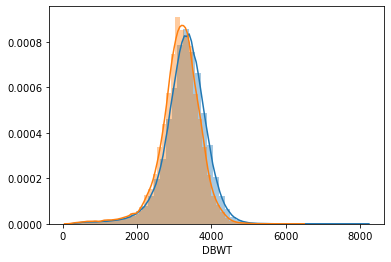

In [109]:
sns.distplot(df[df['MAGER_cat'].eq('Adult')]['DBWT'])
sns.distplot(df[df['MAGER_cat'].eq('Minor')]['DBWT'])
# sns.distplot(df[df['MAGER_cat'].eq('Mature')]['DBWT'])

In [110]:
df['MEDUC'].value_counts()

3    734173
6    715077
4    612754
7    333399
5    273746
2    240200
8     96937
1     91989
9     34662
Name: MEDUC, dtype: int64

In [111]:
df['FAGECOMB'].value_counts()

32    193145
31    191302
33    187393
30    186916
29    176911
34    175848
28    167529
35    163517
27    152675
36    146705
26    136989
37    126840
25    121191
38    107937
24    105310
23     90354
39     88714
22     75573
40     72358
21     61289
41     59096
20     46660
42     46400
43     38196
19     31189
44     30003
45     24537
46     19837
18     16928
47     16721
48     13304
49     10307
50      8073
17      7243
51      6220
52      5192
53      4184
54      3320
55      2752
16      2621
56      2285
57      1721
58      1453
59      1108
60       968
61       718
15       707
62       570
63       439
64       321
65       255
66       185
67       156
14       142
68       123
69       112
70        84
71        79
72        50
73        39
74        25
75        25
77        22
13        15
76        14
78        10
83         6
80         5
81         4
79         3
82         3
84         3
88         2
12         1
98         1
95         1
85         1

In [112]:
condition =[df['pregnancy_length'].eq(9),
            df['pregnancy_length'].eq(8),
            df['pregnancy_length'].eq(10),
            df['pregnancy_length'].lt(7)
    
]
choices = ['9',
          '8',
           '10',
           'Early'
]

df['pregnancy_length_cat'] = np.select(condition,choices, 'Late')

In [113]:
X = df[['ATTEND','BFACIL', 'smoked', 'DOB_MM', 'DMAR','FAGECOMB','FHISPX','FEDUC', 'FRACE6', 'first_birth', 'plural_delivery', 'first_pregnancy', 'first_natal',
        'IP_GON', 'LD_INDL', 'MAGER', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN', 'pregnancy_length', 'WTGAIN_div_MOM_weight','WTGAIN_div_length',
        'NO_INFEC','NO_MMORB','NO_RISKS','PAY', 'PAY_REC','PRECARE','PREVIS', 'PRIORDEAD_cat', 'PRIORLIVE_cat', 'PRIORTERM_cat', 'PWgt_R', 'BMI_log','M_Ht_In', 'MOM_weight',
        'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX', 'WTGAIN','WT_percent_gain','MAGER_cat','pregnancy_length_cat'
]]
_X = pd.get_dummies(X, columns=['ATTEND', 'BFACIL','smoked', 'DOB_MM','DMAR','FHISPX','FEDUC','FRACE6', 'plural_delivery',
                                'IP_GON','LD_INDL', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN',
                                'NO_INFEC','NO_MMORB','NO_RISKS', 'PAY', 'PAY_REC','PRIORDEAD_cat', 'PRIORLIVE_cat','PRIORTERM_cat',
                                'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX','MAGER_cat','pregnancy_length_cat'])
y = df['DBWT']

In [114]:
_X.shape

(3132937, 167)

In [115]:
# _parents_X = _X[['FRACE6_1',
#  'FRACE6_2',
#  'FRACE6_3',
#  'FRACE6_4',
#  'FRACE6_5',
#  'FRACE6_6',
#  'FRACE6_9',

#  'MRAVE6_1',
#  'MRAVE6_2',
#  'MRAVE6_3',
#  'MRAVE6_4',
#  'MRAVE6_5',
#  'MRAVE6_6']]
# poly_2 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
# poly2_data = poly_2.fit_transform(_parents_X)
# poly2_columns = poly_2.get_feature_names(_parents_X.columns)
# df_poly2 = pd.DataFrame(poly2_data, columns = poly2_columns)
# df_poly2.reset_index(inplace=True,drop=True)

In [116]:
# _X.drop(columns = ['FRACE6_1',
#  'FRACE6_2',
#  'FRACE6_3',
#  'FRACE6_4',
#  'FRACE6_5',
#  'FRACE6_6',
#  'FRACE6_9',

#  'MRAVE6_1',
#  'MRAVE6_2',
#  'MRAVE6_3',
#  'MRAVE6_4',
#  'MRAVE6_5',
#  'MRAVE6_6'],inplace=True)
# _X.shape

In [117]:
# _X.reset_index(inplace=True, drop=True)

In [118]:
# _X = _X.join(df_poly2)

In [119]:
_X.shape

(3132937, 167)

In [120]:
_X['MAGER_smoked_Daily'] = _X['MAGER'] * _X['smoked_Daily']
_X['NO_RISKS_1_length'] = _X['NO_RISKS_1'] * _X['pregnancy_length']
# _X['SEX_M_WTGAIN'] = _X['SEX_M'] * _X['WTGAIN']
_X['RDMETH_REC_3_length'] = _X['RDMETH_REC_3'] * _X['pregnancy_length']
_X['RDMETH_REC_1_length'] = _X['RDMETH_REC_1'] * _X['pregnancy_length']
_X['ATTEND_1_length'] = _X['pregnancy_length'] * _X['ATTEND_1']
# _X['MRAVE_6_1_M_Ht_In'] = _X['MRAVE6_1'] * _X['BMI_log']
_X['MRAVE6_1_FRACE6_1'] = _X['MRAVE6_1'] * _X['FRACE6_1']
_X['BFACIL_1_length'] = _X['pregnancy_length'] * _X['BFACIL_1']
_X['BMI_log_length'] = _X['BMI_log'] * _X['pregnancy_length']
_X['M_Ht_In_length'] = _X['DMAR_1'] * _X['pregnancy_length']
_X['LD_INDL_N_length'] = _X['LD_INDL_N'] * _X['pregnancy_length']
_X['MTRAN_Y_length'] = _X['MTRAN_Y'] * _X['pregnancy_length']
_X['PRECARE_length'] = _X['PRECARE'] * _X['pregnancy_length']
_X['PREVIS_length'] = _X['PREVIS'] * _X['pregnancy_length']
_X['MOM_weight_length'] = _X['MOM_weight'] * _X['pregnancy_length']

_X['RDMETH_REC_3_pregnancy_length_cat_9'] = _X['RDMETH_REC_3'] * _X['pregnancy_length_cat_9']
_X['RF_CESAR_Y_pregnancy_length_cat_9'] = _X['RF_CESAR_Y'] * _X['pregnancy_length_cat_9']

In [121]:

# # _X['DBWT'] = y
# from statsmodels.formula.api import ols
# formula = 'DBWT~BMI_log+WTGAIN+M_Ht_In+smoked_None+SEX_M+BFACIL_1+ATTEND_1+DMAR_1+FRACE6_1+FEDUC_3+FRACE6_1+first_birth+plural_delivery_Yes+first_natal+LD_INDL_N\
# +MBSTATE_REC_1+MEDUC_6+MHISPX_0+MRAVE6_2+MRAVE6_1+MTRAN_Y+NO_RISKS_1+PAY_1+PRECARE+PREVIS+PRIORDEAD_cat_Yes+RDMETH_REC_3+RF_CESAR_Y+MAGER_smoked_Daily+pregnancy_length+MOM_weight\
# +WTGAIN_div_MOM_weight+WTGAIN_div_length+NO_RISKS_1_length+RDMETH_REC_3_length+RDMETH_REC_1_length+ATTEND_1_length+BFACIL_1_length+BMI_log_length+M_Ht_In_length\
# +LD_INDL_N_length+LD_INDL_N_length+MTRAN_Y_length+NO_RISKS_1_length+PREVIS_length+MOM_weight_length+pregnancy_length_cat_9+pregnancy_length_cat_8\
# +pregnancy_length_cat_10+pregnancy_length_cat_Early+RDMETH_REC_3_pregnancy_length_cat_9+RF_CESAR_Y_pregnancy_length_cat_9'
# model = ols(formula=formula, data=_X).fit()
# model.summary()

PatsyError: Error evaluating factor: NameError: name 'DBWT' is not defined
    DBWT~BMI_log+WTGAIN+M_Ht_In+smoked_None+SEX_M+BFACIL_1+ATTEND_1+DMAR_1+FRACE6_1+FEDUC_3+FRACE6_1+first_birth+plural_delivery_Yes+first_natal+LD_INDL_N+MBSTATE_REC_1+MEDUC_6+MHISPX_0+MRAVE6_2+MRAVE6_1+MTRAN_Y+NO_RISKS_1+PAY_1+PRECARE+PREVIS+PRIORDEAD_cat_Yes+RDMETH_REC_3+RF_CESAR_Y+MAGER_smoked_Daily+pregnancy_length+MOM_weight+WTGAIN_div_MOM_weight+WTGAIN_div_length+NO_RISKS_1_length+RDMETH_REC_3_length+RDMETH_REC_1_length+ATTEND_1_length+BFACIL_1_length+BMI_log_length+M_Ht_In_length+LD_INDL_N_length+LD_INDL_N_length+MTRAN_Y_length+NO_RISKS_1_length+PREVIS_length+MOM_weight_length+pregnancy_length_cat_9+pregnancy_length_cat_8+pregnancy_length_cat_10+pregnancy_length_cat_Early+RDMETH_REC_3_pregnancy_length_cat_9+RF_CESAR_Y_pregnancy_length_cat_9
    ^^^^

In [122]:
_X.columns


Index(['FAGECOMB', 'first_birth', 'first_pregnancy', 'first_natal', 'MAGER',
       'pregnancy_length', 'WTGAIN_div_MOM_weight', 'WTGAIN_div_length',
       'PRECARE', 'PREVIS',
       ...
       'BFACIL_1_length', 'BMI_log_length', 'M_Ht_In_length',
       'LD_INDL_N_length', 'MTRAN_Y_length', 'PRECARE_length', 'PREVIS_length',
       'MOM_weight_length', 'RDMETH_REC_3_pregnancy_length_cat_9',
       'RF_CESAR_Y_pregnancy_length_cat_9'],
      dtype='object', length=183)

In [123]:
# poly_2 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
# poly2_data = poly_2.fit_transform(_parents_X)
# poly2_columns = poly_2.get_feature_names(_parents_X.columns)
# df_poly2 = pd.DataFrame(poly2_data, columns = poly2_columns)
# df_poly2.shape

In [124]:
_X.shape

(3132937, 183)

In [125]:
# df_poly2

In [126]:
# _df = _X.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# _df['pairs'] = list(zip(_df.level_0, _df.level_1))
# _df.set_index(['pairs'], inplace=True)
# _df.drop(columns =['level_1', 'level_0'], inplace=True)
# _df.columns = ['cc']
# _df.drop_duplicates(inplace=True)
# _to_remove = _df[(_df.cc>.75) & (_df.cc<1)]
# _to_remove

In [127]:
_X

,FAGECOMB,first_birth,first_pregnancy,first_natal,MAGER,pregnancy_length,WTGAIN_div_MOM_weight,WTGAIN_div_length,PRECARE,PREVIS,PWgt_R,BMI_log,M_Ht_In,MOM_weight,WTGAIN,WT_percent_gain,ATTEND_1,ATTEND_2,ATTEND_3,ATTEND_4,ATTEND_5,ATTEND_9,BFACIL_1,BFACIL_2,BFACIL_3,BFACIL_4,BFACIL_5,BFACIL_6,BFACIL_7,BFACIL_9,smoked_Daily,smoked_None,smoked_Unknown,DOB_MM_1,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,DOB_MM_10,DOB_MM_11,DOB_MM_12,DMAR_,DMAR_1,DMAR_2,FHISPX_0,FHISPX_1,FHISPX_2,FHISPX_3,FHISPX_4,FHISPX_5,FHISPX_6,FHISPX_9,FEDUC_1,FEDUC_2,FEDUC_3,FEDUC_4,FEDUC_5,FEDUC_6,FEDUC_7,FEDUC_8,FEDUC_9,FRACE6_1,FRACE6_2,FRACE6_3,FRACE6_4,FRACE6_5,FRACE6_6,FRACE6_9,plural_delivery_No,plural_delivery_Yes,IP_GON_N,IP_GON_U,IP_GON_Y,LD_INDL_N,LD_INDL_U,LD_INDL_Y,35AGE_older_0,35AGE_older_1,MAR_IMP_,MAR_IMP_1,MBSTATE_REC_1,MBSTATE_REC_2,MBSTATE_REC_3,MEDUC_1,MEDUC_2,MEDUC_3,MEDUC_4,MEDUC_5,MEDUC_6,MEDUC_7,MEDUC_8,MEDUC_9,MHISPX_0,MHISPX_1,MHISPX_2,MHISPX_3,MHISPX_4,MHISPX_5,MHISPX_6,MHISPX_9,MRAVE6_1,MRAVE6_2,MRAVE6_3,MRAVE6_4,MRAVE6_5,MRAVE6_6,MTRAN_N,MTRAN_U,MTRAN_Y,NO_INFEC_0,NO_INFEC_1,NO_INFEC_9,NO_MMORB_0,NO_MMORB_1,NO_MMORB_9,NO_RISKS_0,NO_RISKS_1,NO_RISKS_9,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_8,PAY_9,PAY_REC_1,PAY_REC_2,PAY_REC_3,PAY_REC_4,PAY_REC_9,PRIORDEAD_cat_None,PRIORDEAD_cat_Unknown,PRIORDEAD_cat_Yes,PRIORLIVE_cat_None,PRIORLIVE_cat_Unknown,PRIORLIVE_cat_Yes,PRIORTERM_cat_None,PRIORTERM_cat_Unknown,PRIORTERM_cat_Yes,RDMETH_REC_1,RDMETH_REC_2,RDMETH_REC_3,RDMETH_REC_4,RDMETH_REC_5,RDMETH_REC_6,RDMETH_REC_9,RESTATUS_1,RESTATUS_2,RESTATUS_3,RESTATUS_4,RF_CESAR_N,RF_CESAR_U,RF_CESAR_Y,SEX_F,SEX_M,MAGER_cat_Adult,MAGER_cat_Minor,pregnancy_length_cat_10,pregnancy_length_cat_8,pregnancy_length_cat_9,pregnancy_length_cat_Early,pregnancy_length_cat_Late,MAGER_smoked_Daily,NO_RISKS_1_length,RDMETH_REC_3_length,RDMETH_REC_1_length,ATTEND_1_length,MRAVE6_1_FRACE6_1,BFACIL_1_length,BMI_log_length,M_Ht_In_length,LD_INDL_N_length,MTRAN_Y_length,PRECARE_length,PREVIS_length,MOM_weight_length,RDMETH_REC_3_pregnancy_length_cat_9,RF_CESAR_Y_pregnancy_length_cat_9
0,31,0,0,0,30,9,0.215839,4.555556,3,8,190,3.424263,66,189.956250,41,0.215789,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,9,0,9,9,1,9,30.818364,9,9,0,27,72,1709.606250,0,0
2,31,0,0,1,28,9,0.269999,6.444444,5,17,215,3.401197,71,214.815341,58,0.269767,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,9,9,1,9,30.610776,9,9,0,45,153,1933.338068,0,0
3,26,0,0,1,23,8,0.000000,0.000000,5,6,138,3.165475,64,137.890909,0,0.000000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,8,0,8,0,0,8,25.323800,0,8,0,40,48,1103.127273,0,0
5,28,0,0,1,26,10,0.235492,4.700000,2,13,200,3.443618,67,199.581960,47,0.235000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,10,0,10,0,1,0,34.436181,10,10,0,20,130,1995.819602,0,0
6,25,0,0,1,28,10,0.062467,1.000000,3,6,160,3.135494,70,160.085227,10,0.062500,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0

In [128]:
# poly_2 = PolynomialFeatures(degree=2, include_bias=False)
# poly2_data = poly_2.fit_transform(_X)
# poly2_columns = poly_2.get_feature_names(_X.columns)
# df_poly2 = pd.DataFrame(poly2_data, columns = poly2_columns)
# df_poly2.shape

In [129]:
_X.shape

(3132937, 183)

In [130]:
y.shape
del df

In [131]:
X_train, X_test, y_train, y_test = train_test_split(_X, y, random_state = 42, test_size= 0.2)


In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns = _X.columns)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(data=X_test, columns = _X.columns)

In [133]:
# _X.corr()

In [134]:
lasso_cv = LassoCV(cv=5, random_state=42, verbose=1)
lasso_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.0min finished
C:\Users\albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18608059002.75226, tolerance: 83100669.4006076
  positive)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=42, selection='cyclic',
        tol=0.0001, verbose=1)

In [135]:
y_train_pred = lasso_cv.predict(X_train)
y_test_pred = lasso_cv.predict(X_test)

In [136]:
np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

460.52762157504134

In [137]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

460.5864731101251

In [138]:
lasso_cv.score(X_train, y_train)

0.36034118441491836

In [139]:
y.describe()

count    3.132937e+06
mean     3.286946e+03
std      5.758142e+02
min      2.270000e+02
25%      2.988000e+03
50%      3.320000e+03
75%      3.645000e+03
max      8.165000e+03
Name: DBWT, dtype: float64

In [140]:
_coef_df = pd.DataFrame()
_coef_df['variables'] = _X.columns
_coef_df['coefficients'] = lasso_cv.coef_
_coef_df.sort_values(by='coefficients')

,variables,coefficients
146,RDMETH_REC_3,-3.139880e+02
178,PRECARE_length,-2.638207e+02
179,PREVIS_length,-1.345580e+02
170,RDMETH_REC_1_length,-1.229207e+02
165,pregnancy_length_cat_Early,-1.003919e+02
166,pregnancy_length_cat_Late,-9.556985e+01
163,pregnancy_length_cat_8,-7.665714e+01
13,MOM_weight,-6.930973e+01
158,SEX_F,-5.824689e+01
119,NO_RISKS_0,-5.388040e+01


In [141]:
_coef_df['coefficients'].describe()

count    183.000000
mean       0.396444
std       52.769175
min     -313.987985
25%       -1.368995
50%       -0.000000
75%        1.570402
max      283.004916
Name: coefficients, dtype: float64

In [142]:
# _coef_df.sort_values(by='coefficients').to_csv('_coef_df2.csv', index=False,header=True)

In [143]:
X

,ATTEND,BFACIL,smoked,DOB_MM,DMAR,FAGECOMB,FHISPX,FEDUC,FRACE6,first_birth,plural_delivery,first_pregnancy,first_natal,IP_GON,LD_INDL,MAGER,35AGE_older,MAR_IMP,MBSTATE_REC,MEDUC,MHISPX,MRAVE6,MTRAN,pregnancy_length,WTGAIN_div_MOM_weight,WTGAIN_div_length,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD_cat,PRIORLIVE_cat,PRIORTERM_cat,PWgt_R,BMI_log,M_Ht_In,MOM_weight,RDMETH_REC,RESTATUS,RF_CESAR,SEX,WTGAIN,WT_percent_gain,MAGER_cat,pregnancy_length_cat
0,1,1,None,1,1,31,1,3,1,0,No,0,0,N,N,30,0,,1,6,0,1,N,9,0.215839,4.555556,1,1,1,2,2,3,8,None,Yes,Yes,190,3.424263,66,189.956250,1,2,N,M,41,0.215789,Adult,9
2,1,1,None,1,1,31,0,4,1,0,No,0,1,N,N,28,0,,1,6,0,1,N,9,0.269999,6.444444,1,1,0,5,4,5,17,None,Yes,None,215,3.401197,71,214.815341,1,1,N,M,58,0.269767,Adult,9
3,3,1,None,1,2,26,0,2,3,0,No,0,1,N,N,23,0,,1,2,0,3,N,8,0.000000,0.000000,1,1,1,1,1,5,6,None,Yes,None,138,3.165475,64,137.890909,1,2,N,F,0,0.000000,Adult,8
5,4,2,None,1,1,28,6,6,1,0,No,0,1,N,N,26,0,,1,6,0,1,N,10,0.235492,4.700000,1,1,1,2,2,2,13,None,Yes,None,200,3.443618,67,199.581960,1,1,N,F,47,0.235000,Adult,10
6,1,1,None,1,1,25,0,6,1,0,No,0,1,N,Y,28,0,,1,4,0,1,N,10,0.062467,1.000000,1,1,1,5,4,3,6,None,Yes,None,160,3.135494,70,160.085227,1,1,N,F,10,0.062500,Adult,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801528,1,1,None,12,2,39,0,3,2,0,No,0,1,N,N,33,0,,1,5,0,2,N,8,0.175909,4.000000,1,1,0,2,2,3,9,None,Yes,None,182,3.380995,66,181.912500,4,1,Y,F,32,0.175824,Adult,8
3801529,1,1,None,12,2,31,2,3,1,0,No,0,1,N,N,32,0,,1,3,0,2,N,8,0.280263,5.875000,1,1,0,1,1,3,10,None,Yes,None,168,3.269569,67,167.699858,4,1,Y,M,47,0.279762,Adult,8
3801530,1,1,None,12,2,31,4,2,1,0,No,0,0,N,N,23,0,,2,2,4,1,N,9,0.051428,1.111111,1,1,1,1,1,2,13,None,Yes,Yes,195,3.478158,65,194.446023,1,1,N,M,10,0.051282,Adult,9
3801531,5,7,None,11,2,45,0,3,4,0,No,0,0,N,N,35,1,,2,3,0,4,N,8,0.141386,2.750000,1,1,1,1,1,2,11,None,Yes,Yes,156,3.317816,63,155.602841,1,1,N,F,22,0.141026,Adult,8


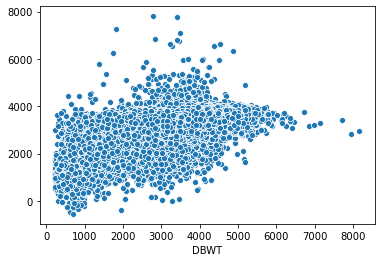

In [144]:
sns.scatterplot(y_test,y_test_pred)

In [ ]:
# _coef_df.to_csv('_coef_df.csv',index=False, header=True)